In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline

from matplotlib.colors import LinearSegmentedColormap

In [2]:
colori_personalizzati = ["#980000", "#00FFFF", "#F81C0F", "#E88B30", "#FFCC00", "#F4EB06",  '#BCFF4C','#3FFCB9', '#20E2F7','#03C5FC','#00018A']
colormap = LinearSegmentedColormap.from_list("custom_colormap", colori_personalizzati)

In [3]:
colors = plt.colormaps['plasma'].resampled(85) #inferno

In [4]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX
    
    


In [5]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.72548 #K

In [6]:
z1 = np.geomspace(1.0e+2,5.0e+6,500)

## Green functions over all the redshift, hubble cooling and Xe are turned down

In [7]:
folder = 'full_gf_hc/batch/PDE-non-linear'
x = []
DT = []
DI_N = []

z = []
Te = []
Tz = []

Xe=[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    a = op.iloc[:, 0].values
    x.append(a)
    b = op.iloc[:, 4].values
    DT.append(b)
    e = op.iloc[:, 6].values
    DI_N.append(e)


    if ((i>8) and (i<99)):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_00{i+1}.dat")
    else: 
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_{i+1}.dat")

    op2 = pd.read_csv(file_path2, skiprows=6, delimiter=' ', header=None)
    d= op2.iloc[:,0]
    z.append(d)
    e= op2.iloc[:,2]
    Te.append(e)
    f = op2.iloc[:,1]
    Tz.append(f)     


    if ((i>8) and (i<99)):
        file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_00{i+1}.dat")
    else: 
        file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_{i+1}.dat")
    
    op3 = pd.read_csv(file_path3, skiprows=6, delimiter=' ', header=None)

    g = op3.iloc[:,1]
    Xe.append(g)

In [8]:
x = np.array(x)
nu = K *x * int(Tz[499][3590]) /h_pl   #transform everythig in the frequency today

In [9]:
folder = 'full_gf_hc/batch/PDE-non-linear/Greens'

z_vis= []
Jbb =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [4], delimiter=' ', header=None)
    Jbb.append(op.iat[0,10])
    z_vis.append(op.iat[0,1])

We don't want to plot all the lines together, they are too many. We can split before the recombination (z = 2000). Recombination happens at 1100, look when is better to split for not having a busy picture

28


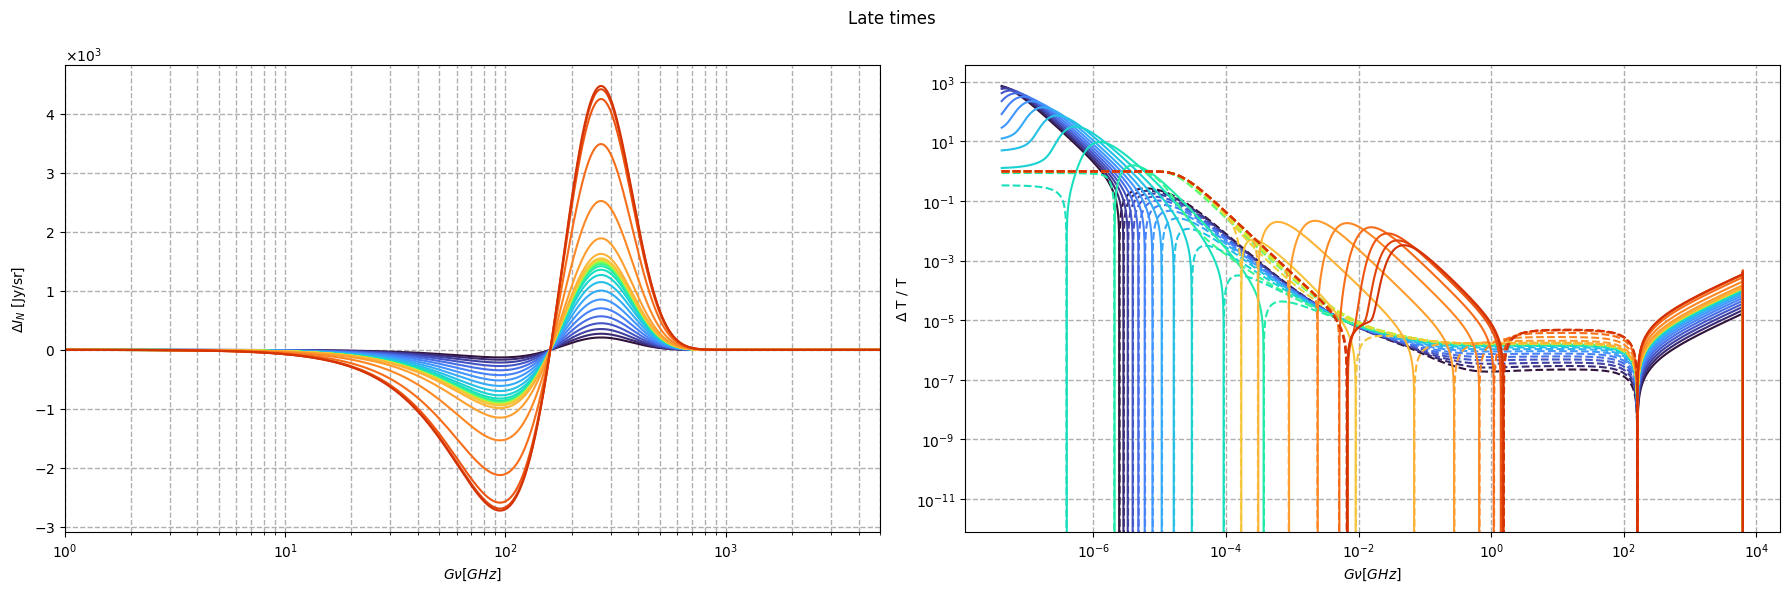

In [10]:
colors = plt.colormaps['turbo'].resampled(32)

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f"Late times ")

# Plot per DI_N2 (primo subplot)
col=0
for i in range(len(z1)):
    if((z1[i]<2000) and (i%5==0)):
        ax1.plot(nu[i]/1e+9, DI_N[i], label=f"z = {sci_notation(z1[i])}", color = colors(col))
        col +=1
print(col)

ax1.set_xscale('log')
ax1.set_xlim([1e+0, 5e+3])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("$G\\nu [GHz]$")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
col = 0
for i in range(len(z1)):
    if((z1[i]<2000) and (i%5==0)):
        ax2.plot(nu[i]/1e9, DT[i], color = colors(col))
        ax2.plot(nu[i]/1e9, -DT[i], color = colors(col), linestyle= "dashed")
        col += 1



ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlim([1e-9, 1e-7])
#ax2.set_ylim([-0.5e-3, 3e+3])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("$G\\nu [GHz]$")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

we want to split late times in high and low frequencies, but how?

72


/tmp/ipykernel_4936/1022717846.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim([-0.2e-3,0.4e-3])


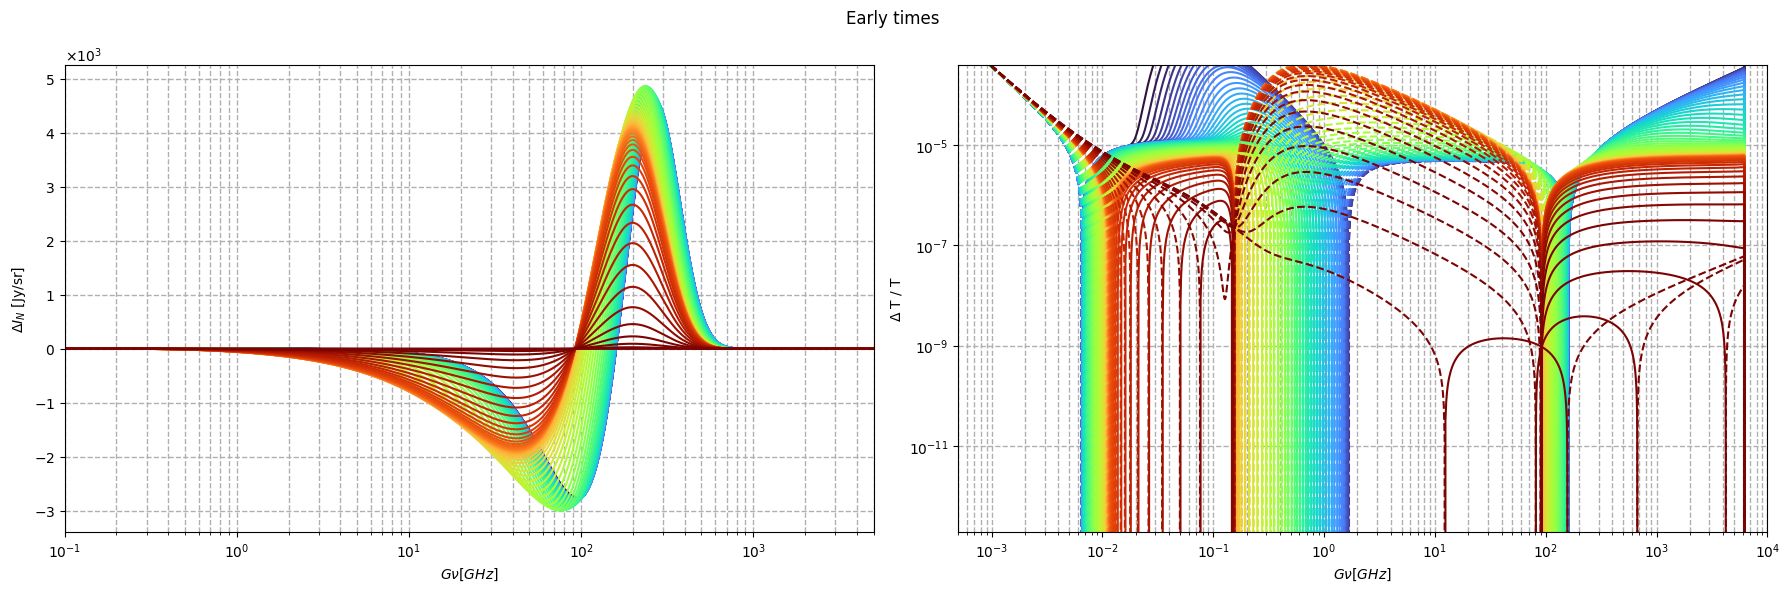

In [11]:
colors = plt.colormaps['turbo'].resampled(68)

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f"Early times ")

# Plot per DI_N2 (primo subplot)
col=0 
for i in range(len(z1)):
    if((z1[i]>2000) and (i%5==0)):
        ax1.plot(nu[i]/1e9, DI_N[i], label=f"z = {sci_notation(z1[i])}", color = colors(col))
        col +=1
print(col)

ax1.set_xscale('log')
ax1.set_xlim([1e-1, 5e+3])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("$G\\nu [GHz]$")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
col=0 
for i in range(len(z1)):
    if((z1[i]>2000) and (i%5==0)):
        ax2.plot(nu[i]/1e9, DT[i], color = colors(col))
        ax2.plot(nu[i]/1e9, -DT[i], color = colors(col), linestyle= "dashed")
        col +=1



ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlim([1e+7, 5e+10])   #lines on the left
ax2.set_xlim([5e-4, 1e+4])   #lines on the right
ax2.set_ylim([-0.2e-3,0.4e-3])

ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("$G\\nu [GHz]$")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [12]:
Jref= lambda x:  

z_vis = np.array(z_vis)


In [13]:
density = np.zeros(len(z1))
temp = np.zeros(len(z1))

rho_cmb = 8 * (np.pi)**5*K**4/(15 *vc**3 * h_pl**3)*Tz[499][3590]**4
#rho_cmb= 

for j in range (len(z1)):
    for i in range (len(x[j])-1):
        h = x[j][i+1] - x[j][i]
        temp[j] = temp[j] + DI_N[j][i]*h
    density[j] = (4*np.pi*K* Tz[499][3590]  /h_pl/vc) / rho_cmb * 1e-26 * temp[j]  



I = density / (1e-5)


print(rho_cmb)

4.4479942627914747e-14


Theoretical visibility function vs the one integrated by the distortion

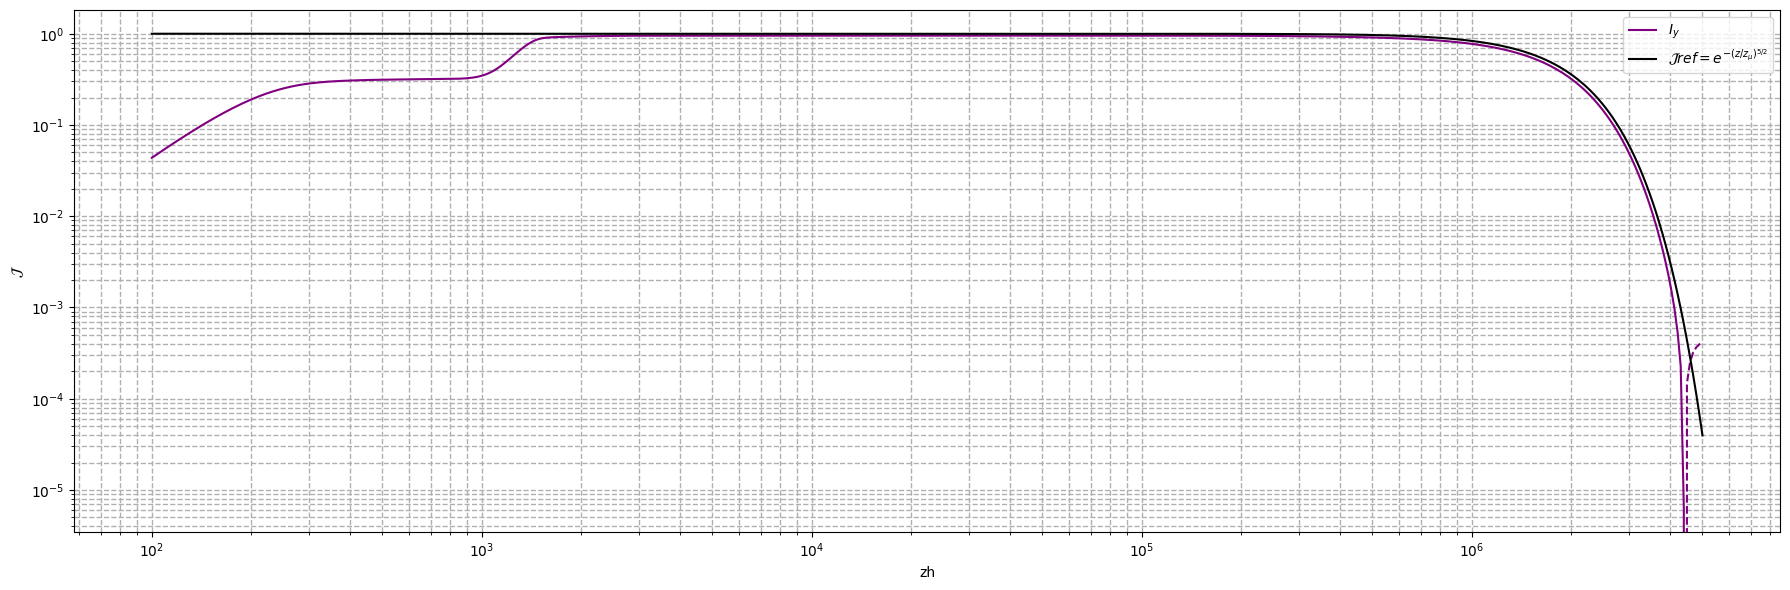

In [14]:
#Plot using the output and not my function integrated

Jbb = np.array(Jbb)
fig, ax = plt.subplots( figsize=(18, 6))
#fig.suptitle(f"Late time visibility function with hubble cooling ")

ax.plot(z_vis, I, color = "purple", label= "$I_y$")
ax.plot(z_vis, -I, color = "purple",linestyle = "dashed")


ax.plot(z_vis, Jref(z_vis), color = "black",label="$\mathcal{J}ref = e^{-(z/z_{\mu})^{5/2}}$")
ax.plot(z_vis, -Jref(z_vis), color = "black",linestyle = "dashed")



ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([100, 10000])
ax.set_ylabel("$\mathcal{J}$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

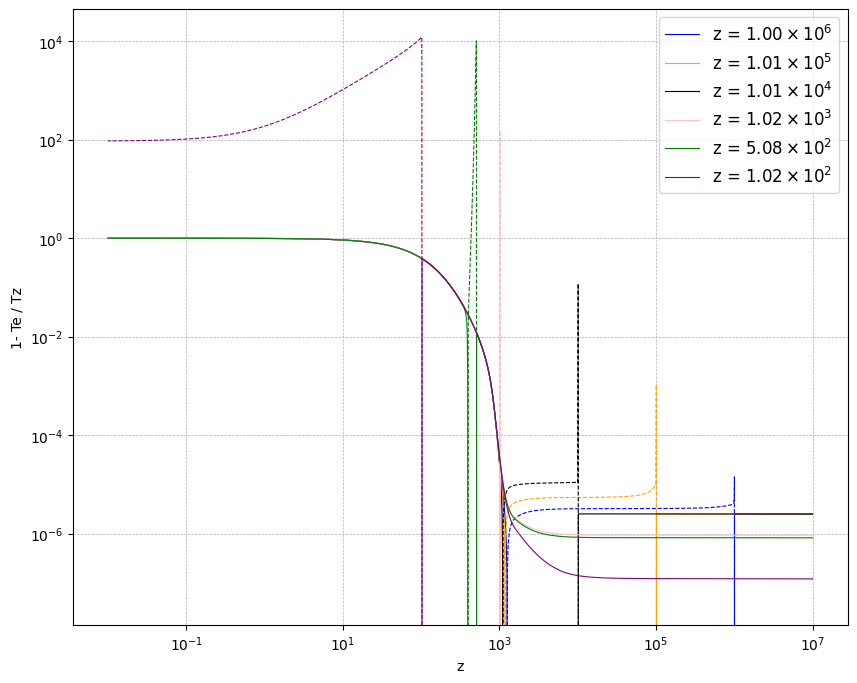

In [15]:
fig, ax = plt.subplots( figsize=(10,8))

for i in range (len(z1)):
    if(z1[i]>1e6):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "blue", label=f"z = {sci_notation(z1[i])}",linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "blue", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e5):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "orange",label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "orange", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e4):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "black", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "black", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e3):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "pink", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "pink", linestyle = "dashed")
        break


for i in range (len(z1)):
    if(z1[i]>5e2):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "green", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "green", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e2):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "purple", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "purple", linestyle = "dashed")
        break



ax.set_xlabel("z")
ax.set_ylabel("1- Te / Tz")
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e2, 1e7])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


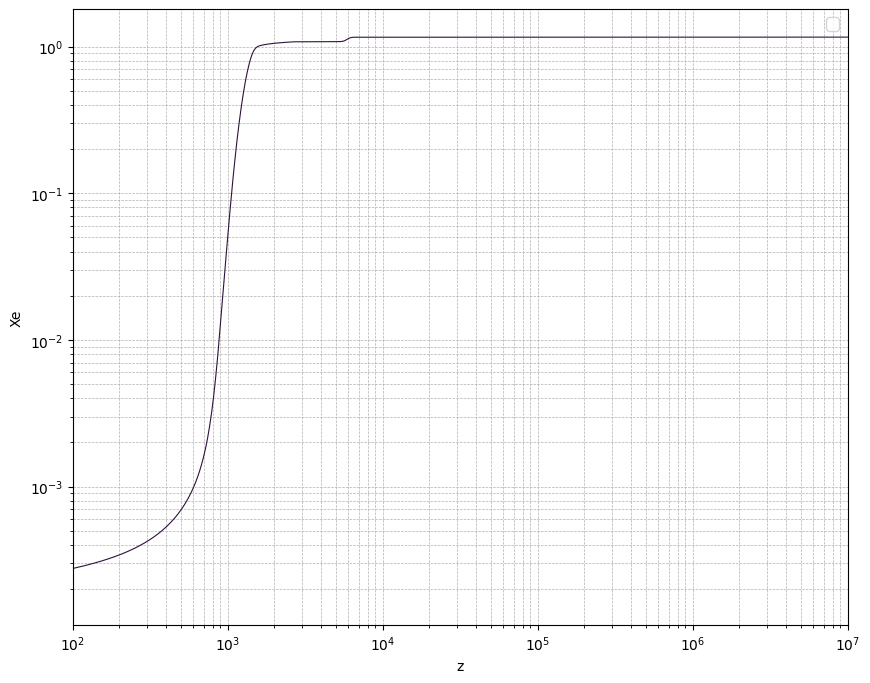

In [16]:
fig, ax = plt.subplots( figsize=(10,8))

#for i in range (len(z1)):
    #if(i%4==0):
ax.plot(z[0], Xe[0], linewidth= "0.8", color = colors(0), linestyle = "solid")
#ax.plot(z[0], -Xe[0], linewidth= "0.8", color = colors(0), linestyle = "dashed")




ax.set_xlabel("z")
ax.set_ylabel("Xe")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e2, 1e7])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)

In [17]:
z1[250]
rev_z = z[250][::-1]
rev_Xe = Xe[250][::-1]

Xe_int = CubicSpline(rev_z, rev_Xe)

### Introducing Xe

In [18]:
folder = 'full_gf_hcxe/batch/PDE-non-linear'
x2 = []
DT2 = []
DI_N2 = []

z2 = []
Te2 = []
Tz2 = []

Xe2=[]
zxe =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    a = op.iloc[:, 0].values
    x2.append(a)
    b = op.iloc[:, 4].values
    DT2.append(b)
    e = op.iloc[:, 6].values
    DI_N2.append(e)


    if ((i>8) and (i<99)):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_00{i+1}.dat")
    else: 
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_{i+1}.dat")

    op2 = pd.read_csv(file_path2, skiprows=6, delimiter=' ', header=None)
    d= op2.iloc[:,0]
    z2.append(d)
    e= op2.iloc[:,2]
    Te2.append(e)
    f = op2.iloc[:,1]
    Tz2.append(f)     


    if ((i>8) and (i<99)):
        file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_00{i+1}.dat")
    else: 
        file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_{i+1}.dat")
    
    op3 = pd.read_csv(file_path3, skiprows=6, delimiter=' ', header=None)

    g = op3.iloc[:,1]
    Xe2.append(g)
    h = op3.iloc[:,0]
    zxe.append(h)

In [19]:
x2 = np.array(x2)
nu2 = K *x2 * int(Tz2[499][3590]) /h_pl   #transform everythig in the frequency today

In [20]:
folder = 'full_gf_hcxe/batch/PDE-non-linear/Greens'

z_vis2= []
Jbb2 =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [4], delimiter=' ', header=None)
    Jbb2.append(op.iat[0,10])
    z_vis2.append(op.iat[0,1])

In [21]:
density2 = np.zeros(len(z1))
temp = np.zeros(len(z1))

for j in range (len(z1)):
    for i in range (len(x[j])-1):
        h = x[j][i+1] - x[j][i]
        temp[j] = temp[j] + DI_N[j][i]*h
    density2[j] = (4*np.pi*K* Tz[499][3590]  /h_pl/vc) / rho_cmb * 1e-26 * temp[j]  

I2 = density2 / (1e-5)

Theoretical J vs numerical integrated

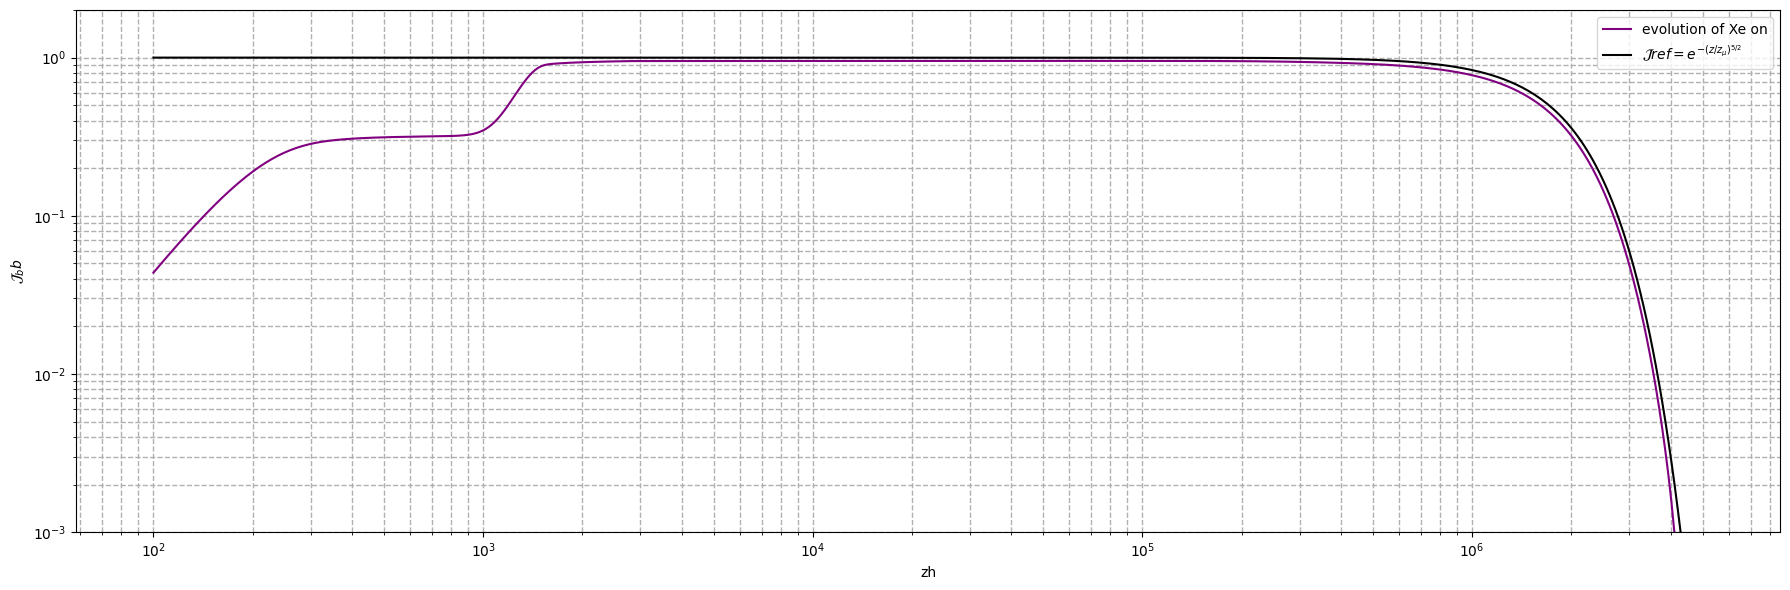

In [22]:

#Plot using the output and not my function integrated


fig, ax = plt.subplots( figsize=(18, 6))
#fig.suptitle(f"Late time visibility function with hubble cooling ")

ax.plot(z_vis2, I2, color = "purple",label="evolution of Xe on")
ax.plot(z_vis2, -I2, color = "purple",linestyle = "dashed")


ax.plot(z_vis, Jref(z_vis), color = "black",label="$\mathcal{J}ref = e^{-(z/z_{\mu})^{5/2}}$")
ax.plot(z_vis, -Jref(z_vis), color = "black",linestyle = "dashed")




ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-3, 2])
ax.set_ylabel("$\mathcal{J}_bb$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

Theoretical J vs output

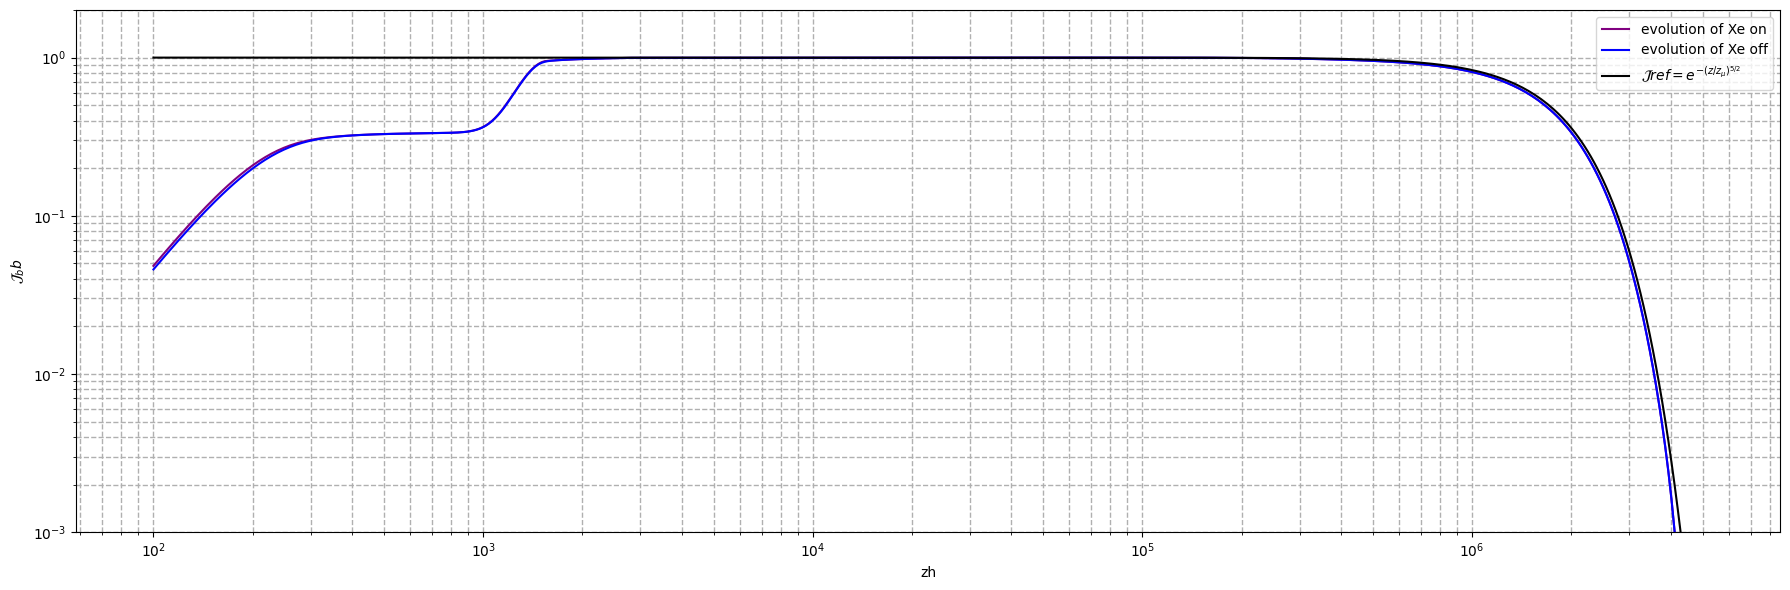

In [23]:
#Plot using the output and not my function integrated

Jbb2 = np.array(Jbb2)
fig, ax = plt.subplots( figsize=(18, 6))
#fig.suptitle(f"Late time visibility function with hubble cooling ")

ax.plot(z_vis2, Jbb2, color = "purple",label="evolution of Xe on")
ax.plot(z_vis2, -Jbb2, color = "purple",linestyle = "dashed")

ax.plot(z_vis, Jbb, color = "blue",label="evolution of Xe off")
ax.plot(z_vis, -Jbb, color = "blue",linestyle = "dashed")

ax.plot(z_vis, Jref(z_vis), color = "black",label="$\mathcal{J}ref = e^{-(z/z_{\mu})^{5/2}}$")
ax.plot(z_vis, -Jref(z_vis), color = "black",linestyle = "dashed")




ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-3, 2])
ax.set_ylabel("$\mathcal{J}_bb$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

28


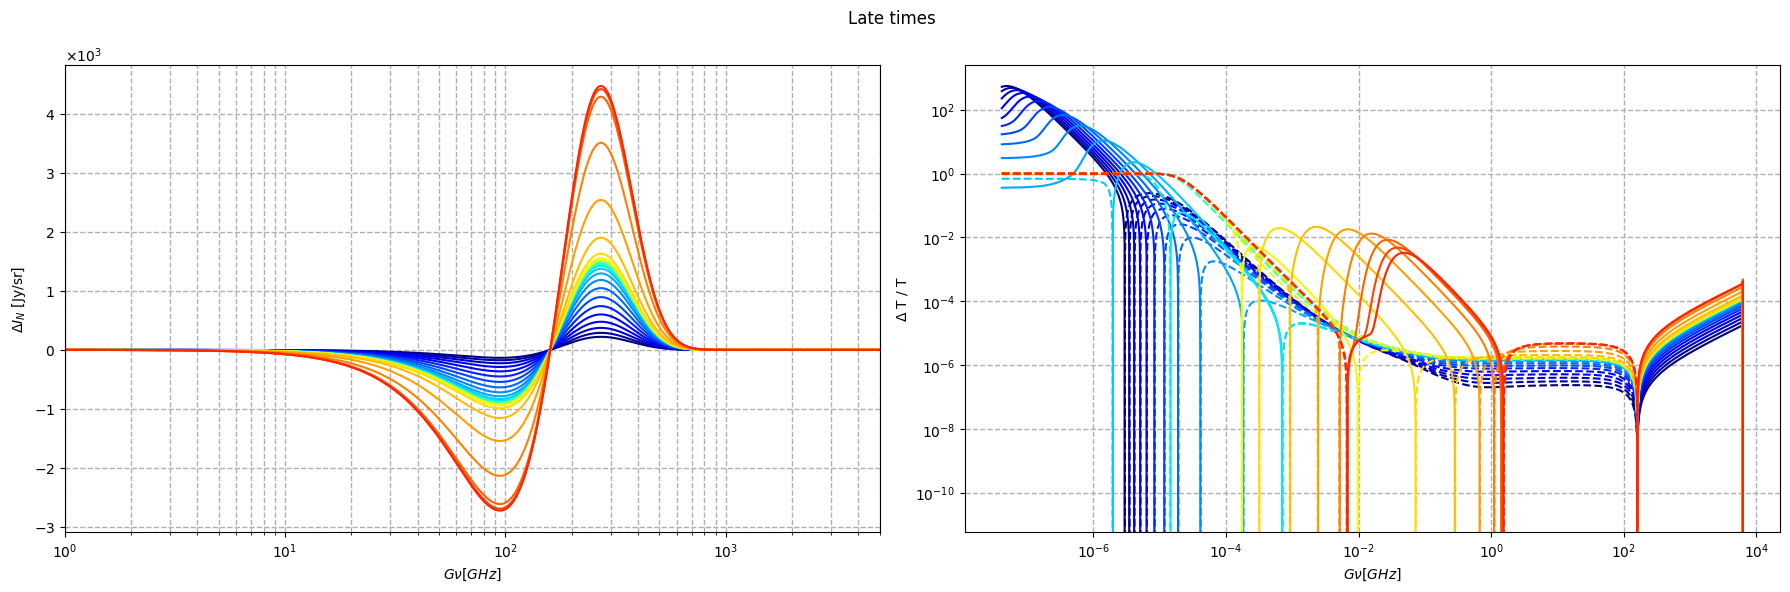

In [24]:
colors = plt.colormaps['jet'].resampled(32)

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f"Late times ")

# Plot per DI_N2 (primo subplot)
col=0
for i in range(len(z1)):
    if((z1[i]<2000) and (i%5==0)):
        ax1.plot(nu2[i]/1e9, DI_N2[i], label=f"z = {sci_notation(z1[i])}", color = colors(col))
        col +=1
print(col)

ax1.set_xscale('log')
ax1.set_xlim([1, 5e+3])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("$G\\nu [GHz]$")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
col = 0
for i in range(len(z1)):
    if((z1[i]<2000) and (i%5==0)):
        ax2.plot(nu2[i]/1e9, DT2[i], color = colors(col))
        ax2.plot(nu2[i]/1e9, -DT2[i], color = colors(col), linestyle= "dashed")
        col += 1



ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlim([1e-9, 1e-7])
#ax2.set_ylim([-0.5e-3, 3e+3])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("$G\\nu [GHz]$")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

72


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fbc044fc8e0>>
Traceback (most recent call last):
  File "/home/sara/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


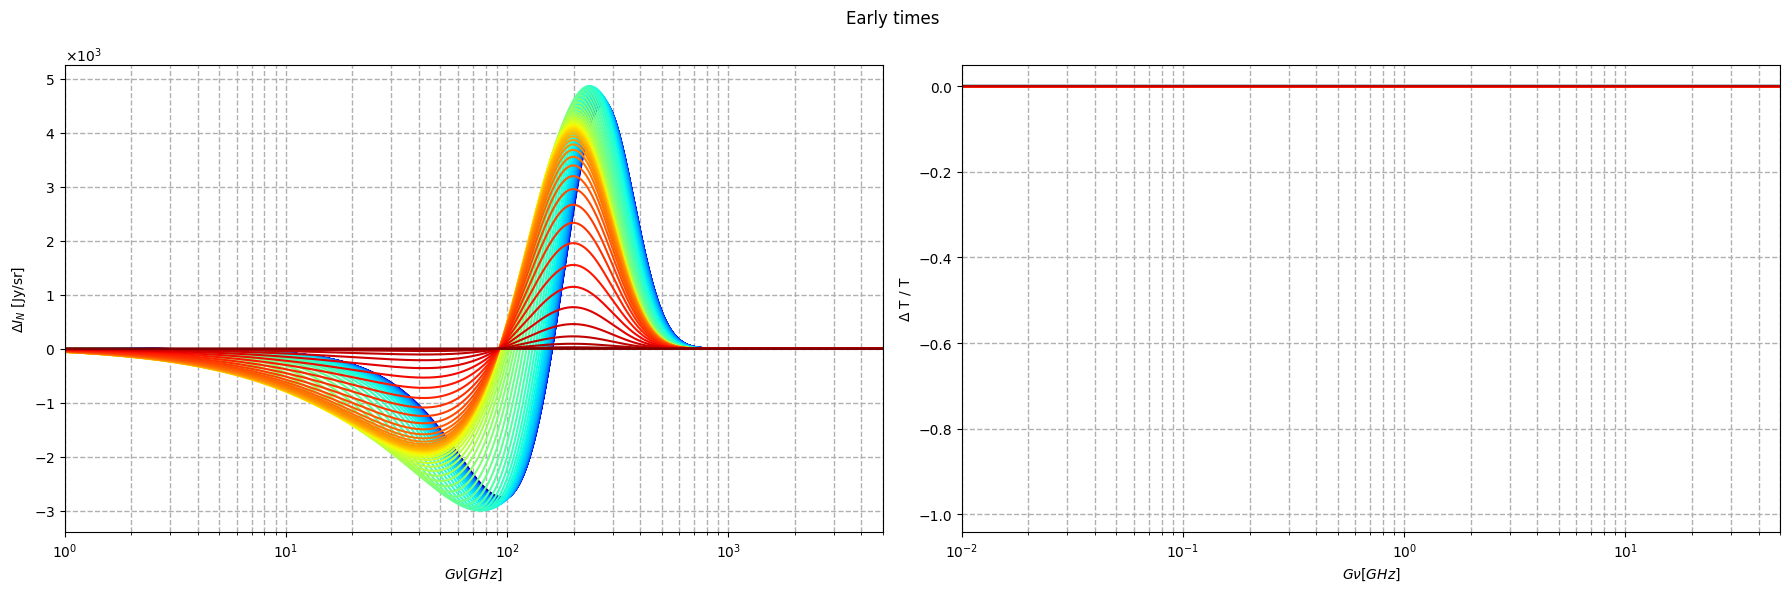

In [25]:
colors = plt.colormaps['jet'].resampled(72)

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f"Early times ")

# Plot per DI_N2 (primo subplot)
col=0 
for i in range(len(z1)):
    if((z1[i]>2000) and (i%5==0)):
        ax1.plot(nu2[i]/1e9, DI_N2[i], label=f"z = {sci_notation(z1[i])}", color = colors(col))
        col +=1
print(col)

ax1.set_xscale('log')
ax1.set_xlim([1, 5e+3])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("$G\\nu [GHz]$")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
col=0 
for i in range(len(z1)):
    if((z1[i]>3000) and (i%5==0)):
        ax2.plot(nu2[i]/1e9, DT2[i], color = colors(col))
        #ax2.plot(nu2[i], -DT2[i], color = colors(col), linestyle= "dashed")
        col +=1



ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.set_xlim([1e-2, 5e+1])   #lines on the left
#ax2.set_xlim([5e+11, 1e+13])   #lines on the right
#ax2.set_ylim([-0.2e-3,0.4e-3])

ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("$G\\nu [GHz]$")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [26]:
len(Xe2[0][::-1])

3543

In [28]:

z1[250]

Xe_int2 = []

for i in range (len(z1)):
    rev_zxe = zxe[i][::-1]
    rev_Xe2 = Xe2[i][::-1]
    Xe_int2.append(CubicSpline(rev_zxe, rev_Xe2))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


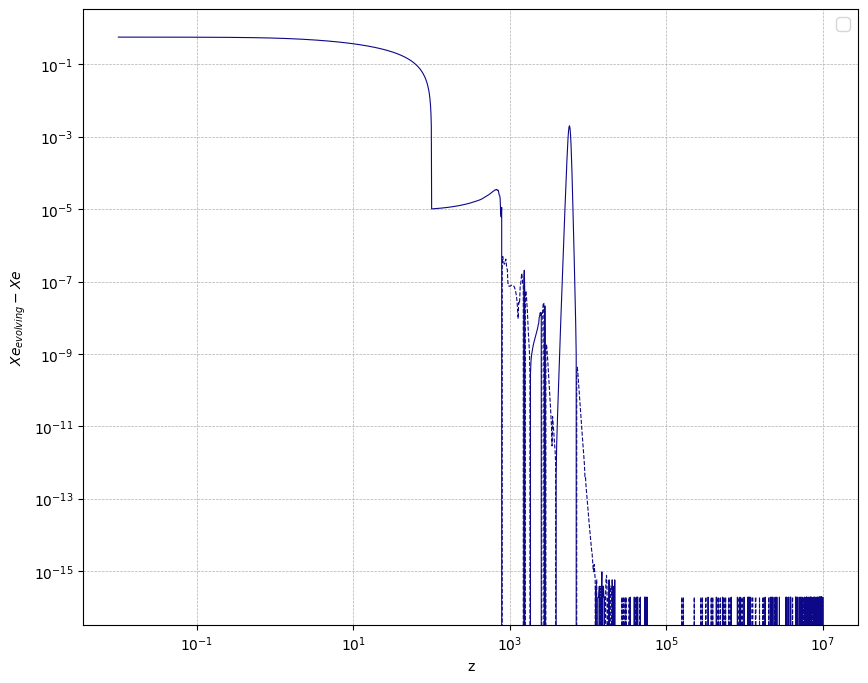

In [29]:
colors = plt.colormaps['plasma'].resampled(500)
fig, ax = plt.subplots(figsize=(10,8))

#for i in range (len(z1)):
    #if(i%4==0):
ax.plot(z2[0], (Xe_int2[0](z2[0])-Xe_int(z2[0]))/Xe_int(z2[0]), linewidth= "0.8", color = colors(0), linestyle = "solid")
ax.plot(z2[0], (Xe_int(z2[0])-Xe_int2[0](z2[0]))/Xe_int(z2[0]), linewidth= "0.8", color = colors(0), linestyle = "dashed")

#ax.plot(z2[0], Xe_int(z2[0]))   
#ax.plot(z2[0], Xe_int2(z2[0]))  

#ax.plot(z[0], Xe[0])   
#ax.plot(z2[0], Xe2[0])



ax.set_xlabel("z")
ax.set_ylabel("$Xe_{evolving}-Xe$")
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e2, 1e7])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)

we may want to interpolate since the redshift grid is different

In [36]:
z1[i]

100.0

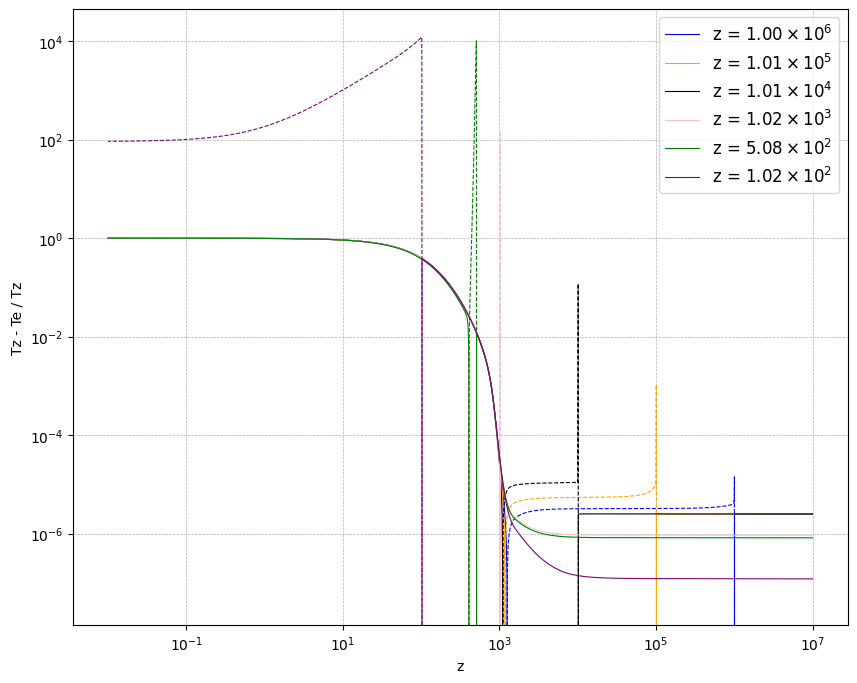

In [37]:
fig, ax = plt.subplots( figsize=(10,8))

for i in range (len(z1)):
    if(z1[i]>1e6):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "blue", label=f"z = {sci_notation(z1[i])}",linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "blue", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e5):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "orange",label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "orange", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e4):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "black", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "black", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e3):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "pink", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "pink", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>5e2):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "green", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "green", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e2):
        ax.plot(z2[i], (Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "purple", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -(Tz2[i]-Te2[i])/Tz2[i], linewidth= "0.8", color = "purple", linestyle = "dashed")
        break



ax.set_xlabel("z")
ax.set_ylabel("Tz - Te / Tz")
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e2, 1e7])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)

The fact that the peaks are smaller at high redshift also depends on the sampling in time, if the termalisation is very quick, and the time step not short enough, maybe the full peak is not visible.

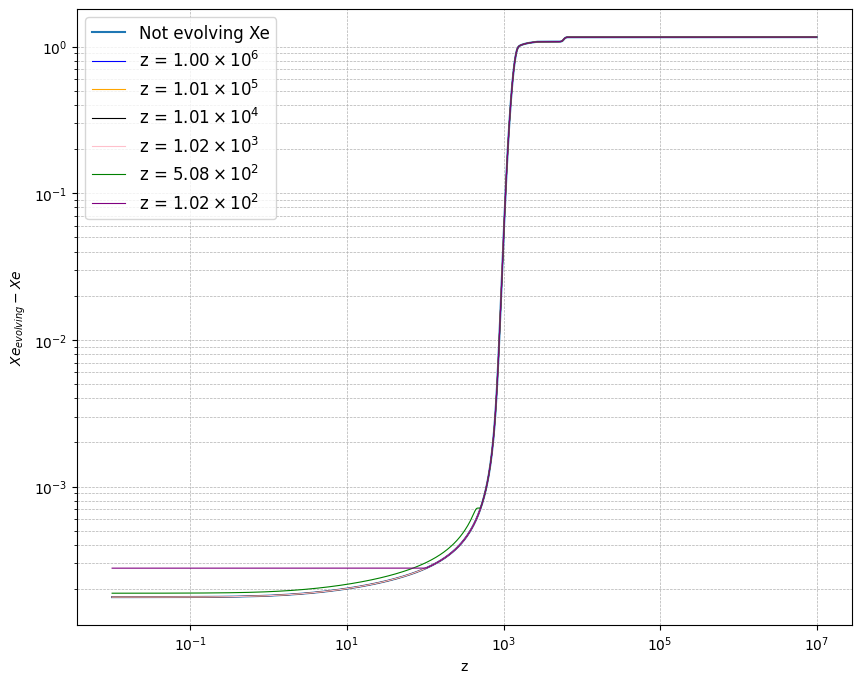

In [32]:
colors = plt.colormaps['plasma'].resampled(500)
fig, ax = plt.subplots( figsize=(10,8))


ax.plot(z[0], Xe_int(z2[0]), label= "Not evolving Xe")  



for i in range (len(z1)):
    if(z1[i]>1e6):
        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "0.8", color = "blue", label=f"z = {sci_notation(z1[i])}",linestyle = "solid")
        ax.plot(z2[i], -Xe_int2[i](z2[i]), linewidth= "0.8", color = "blue", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e5):
        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "0.8", color = "orange",label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -Xe_int2[i](z2[i]), linewidth= "0.8", color = "orange", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e4):
        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "0.8", color = "black", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -Xe_int2[i](z2[i]), linewidth= "0.8", color = "black", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e3):
        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "0.8", color = "pink", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -Xe_int2[i](z2[i]), linewidth= "0.8", color = "pink", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>5e2):
        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "0.8", color = "green", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -Xe_int2[i](z2[i]), linewidth= "0.8", color = "green", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e2):
        ax.plot(z2[i], Xe_int2[i](z2[i]), linewidth= "0.8", color = "purple", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z2[i], -Xe_int2[i](z2[i]), linewidth= "0.8", color = "purple", linestyle = "dashed")
        break


#ax.plot(z[0], Xe[0])   
#ax.plot(z2[0], Xe2[0])



ax.set_xlabel("z")
ax.set_ylabel("$Xe_{evolving}-Xe$")
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([0, 1e-1])
#ax.set_ylim([1e-4, 1e-3])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)